In [1]:
# Reference: https://www.ritchieng.com/machine-learning-multinomial-naive-bayes-vectorization/

# Import all necessary libraries.
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


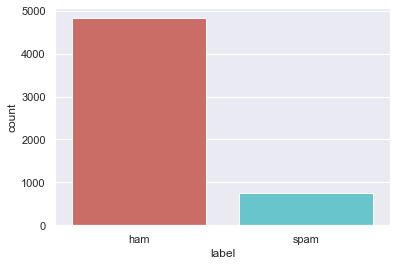

In [15]:
# Read SMS data base with pandas.
#url = 'https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv'
#sms = pd.read_table(url, header=None, names=['label', 'message'])
file='../../../../data/sms.tsv'
sms = pd.read_table(file, header=None, names=['label', 'message'])

# examine the first 10 rows
print(sms.head())

# Convert label to a numerical variable
sms['label_num'] = sms.label.map({'ham':0, 'spam':1})

# Create feature and label vectors.
X = sms.message
y = sms.label_num

sns.countplot(x='label', data=sms, palette='hls')
plt.show()

In [3]:
#Split array into random train and test subsets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [4]:
# Convert a collection of text documents into a matrix of token counts.
vect = CountVectorizer()
# Learn the vocabulary dictionary and return term-document matrix.
# This is equivalent to fit followed by transform, but more efficiently implemented.
X_train_dtm = vect.fit_transform(X_train)

In [5]:
# Instantiate a Multinomial Naive Bayes model.
nb = MultinomialNB()

In [6]:
# Train the MultinomialNB model.
nb.fit(X_train_dtm, y_train)

MultinomialNB()

In [7]:
# Transform document into document-term matrix.
X_test_dtm = vect.transform(X_test)
# Perform classification on an array of test vectors X_test_dtm.
y_pred_class = nb.predict(X_test_dtm)

In [8]:
# Calculate accuracy of class predictions.
metrics.accuracy_score(y_test, y_pred_class)

0.9885139985642498

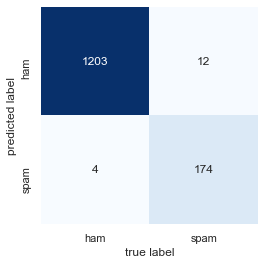

In [9]:
# Plot the confusion matrix
mat = confusion_matrix(y_test, y_pred_class)
sns.set()
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=['ham','spam'], yticklabels=['ham','spam'], cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

In [10]:
# Print messages for the false positives (ham incorrectly classified as spam).
X_test[y_pred_class > y_test]

1988                     No calls..messages..missed calls
45                       No calls..messages..missed calls
1260    We have sent JD for Customer Service cum Accou...
2173     Yavnt tried yet and never played original either
Name: message, dtype: object

In [11]:
# Print messages for the false negatives (spam incorrectly classified as ham).
X_test[y_pred_class < y_test]

3864    Oh my god! I've found your number again! I'm s...
2575    Your next amazing xxx PICSFREE1 video will be ...
2402    Babe: U want me dont u baby! Im nasty and have...
2663    Hello darling how are you today? I would love ...
751     Do you realize that in about 40 years, we'll h...
856     Talk sexy!! Make new friends or fall in love i...
3360    Sorry I missed your call let's talk when you h...
3425    Am new 2 club & dont fink we met yet Will B gr...
731     Email AlertFrom: Jeri StewartSize: 2KBSubject:...
1893    CALL 09090900040 & LISTEN TO EXTREME DIRTY LIV...
68      Did you hear about the new "Divorce Barbie"? I...
3132    LookAtMe!: Thanks for your purchase of a video...
Name: message, dtype: object

In [12]:
# Example of a false negative.
X_test[1893]

'CALL 09090900040 & LISTEN TO EXTREME DIRTY LIVE CHAT GOING ON IN THE OFFICE RIGHT NOW TOTAL PRIVACY NO ONE KNOWS YOUR [sic] LISTENING 60P MIN 24/7MP 0870753331018+'

In [13]:
# Calculate predicted probabilities for X_test_dtm (poorly calibrated).
y_pred_prob = nb.predict_proba(X_test_dtm)[:, 1]
# Calculate AUC.
metrics.roc_auc_score(y_test, y_pred_prob)

0.978610435541777

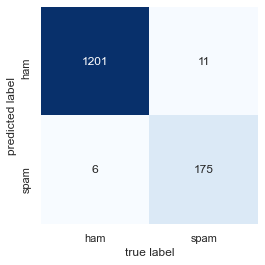

In [14]:
# remove English stop words
vect = CountVectorizer(stop_words='english', ngram_range=(1, 2), max_df=0.5, min_df=2)

# Learn the vocabulary dictionary and return term-document matrix.
X_train_dtm = vect.fit_transform(X_train)

# Instantiate a Multinomial Naive Bayes model.
nb = MultinomialNB()

# Train the MultinomialNB model.
nb.fit(X_train_dtm, y_train)

# Transform document into document-term matrix.
X_test_dtm = vect.transform(X_test)

# Perform classification on an array of test vectors X_test_dtm.
y_pred_class = nb.predict(X_test_dtm)

# Calculate accuracy of class predictions.
metrics.accuracy_score(y_test, y_pred_class)

# Plot the confusion matrix
mat = confusion_matrix(y_test, y_pred_class)
sns.set()
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=['ham','spam'], yticklabels=['ham','spam'], cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()